Capstone

Preprocesing Part


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# # # Separate features and target variable
# # X = df.drop('ObesityCategory', axis=1)
# # y = df['ObesityCategory']


Importing Dataset


In [25]:
setDatos = pd.read_csv('obesity_data.csv')

In [26]:
setDatos.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [27]:
setDatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [28]:
columnaNumerica = setDatos.select_dtypes(include= ["int64", "float64"]).columns

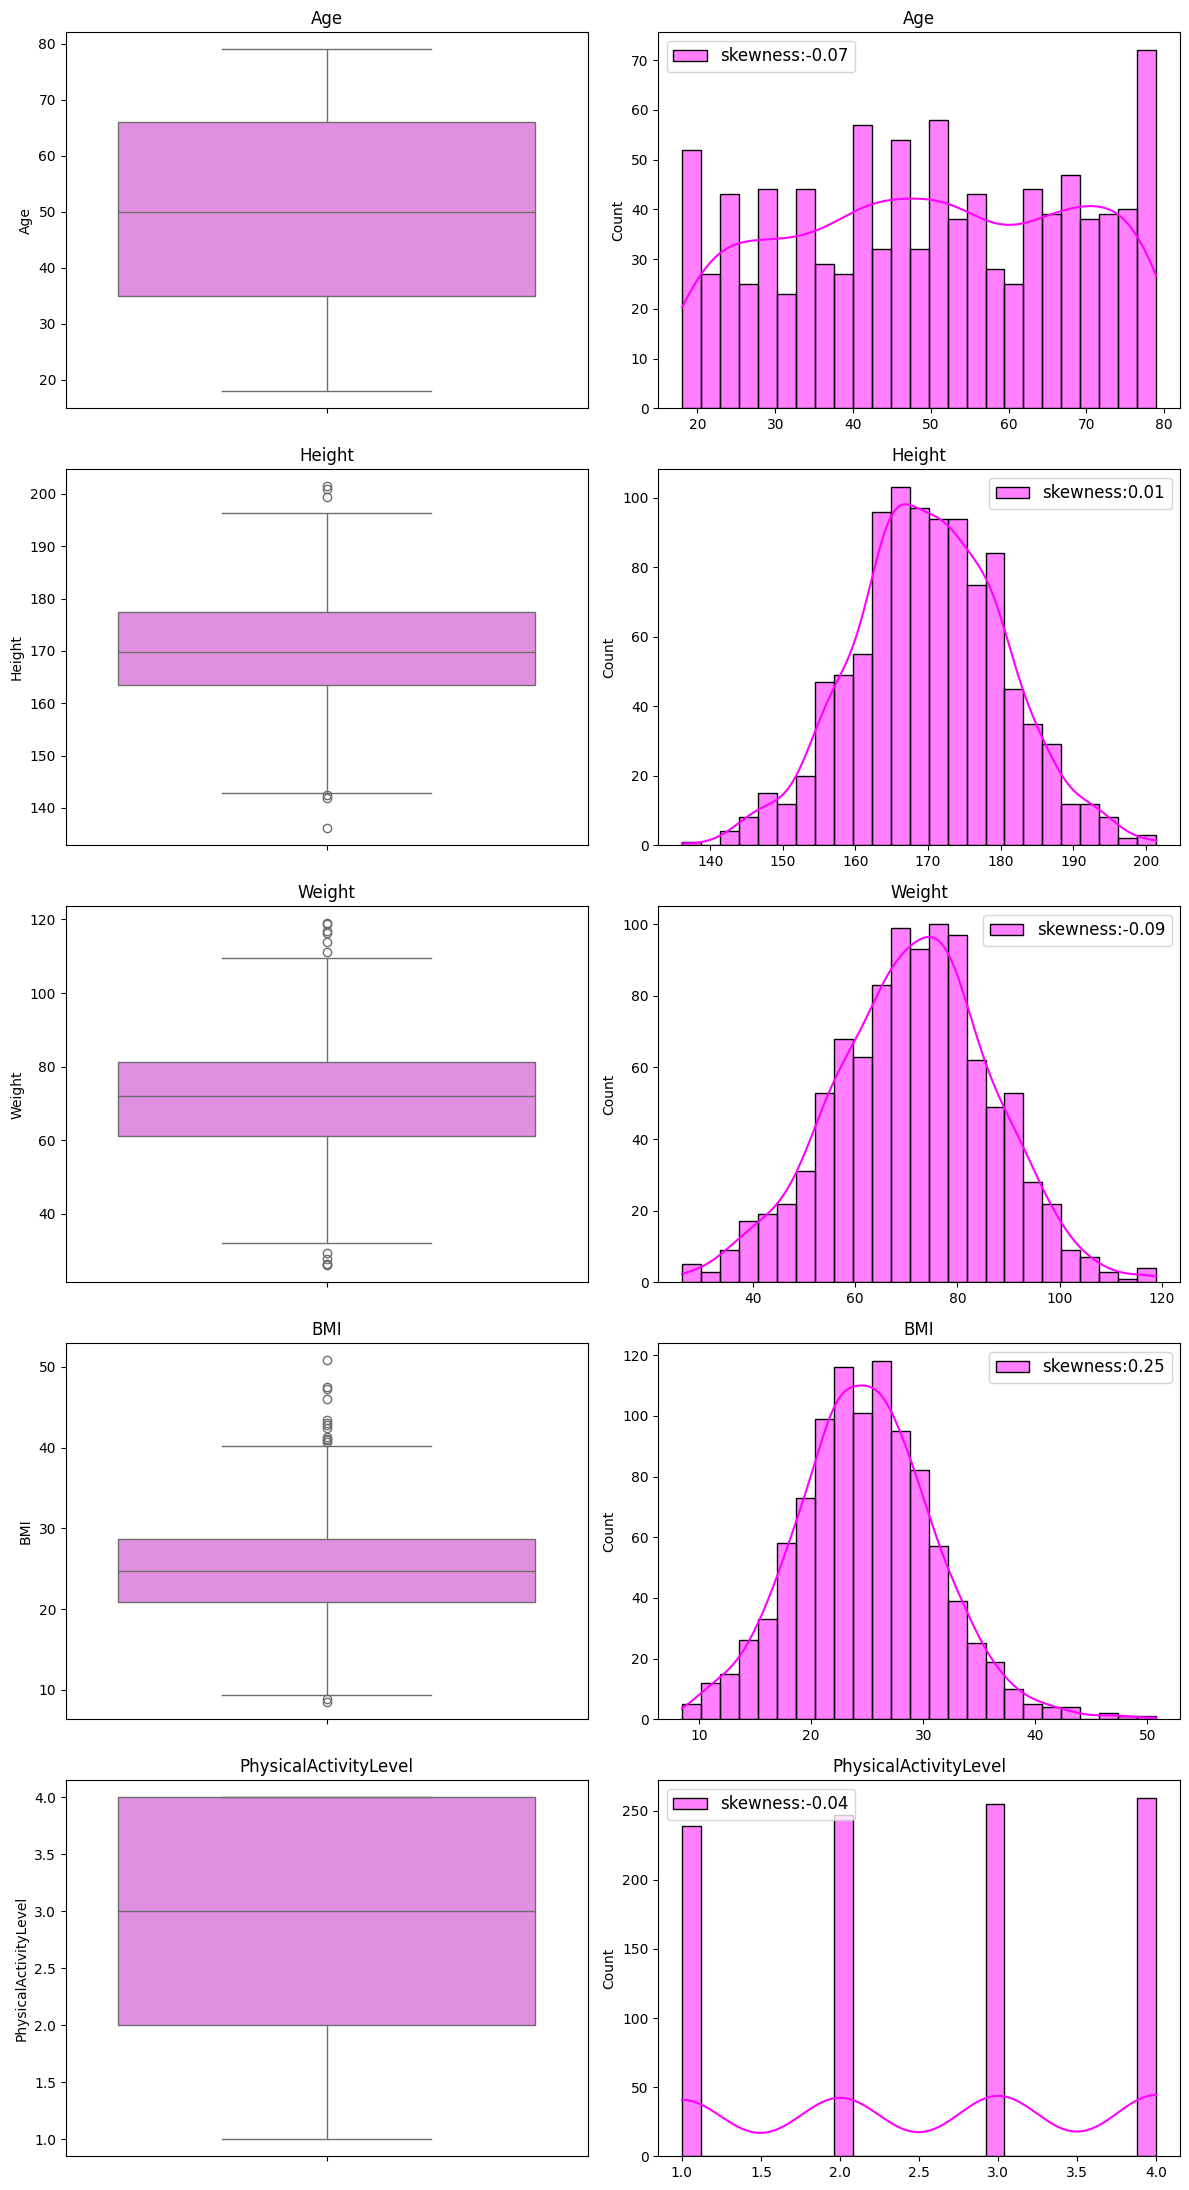

In [29]:
plt.figure(figsize=(12,22))
j = 1
for i in columnaNumerica:
    plt.subplot(5,2, j)
    sns.boxplot(setDatos[i], color="violet")
    plt.title(f"{i}")
    plt.subplot(5,2, j+1)
    sns.histplot(setDatos[i], kde=True, color="magenta", label=f"skewness:{setDatos[i].skew().round(2)}", bins=25)
    plt.title(f"{i}"), plt.xlabel("")
    j += 2
    plt.legend(fontsize="large")
plt.tight_layout()
plt.show()

In [30]:
noGenObese = setDatos.drop(["Gender", "ObesityCategory"], axis=1).corr()
noGenObese

,Age,Height,Weight,BMI,PhysicalActivityLevel
Age,1.000000,0.019647,-0.061400,-0.059971,-0.022308
Height,0.019647,1.000000,0.016033,-0.477091,0.030380
Weight,-0.061400,0.016033,1.000000,0.861438,0.063406
BMI,-0.059971,-0.477091,0.861438,1.000000,0.038020
PhysicalActivityLevel,-0.022308,0.030380,0.063406,0.038020,1.000000


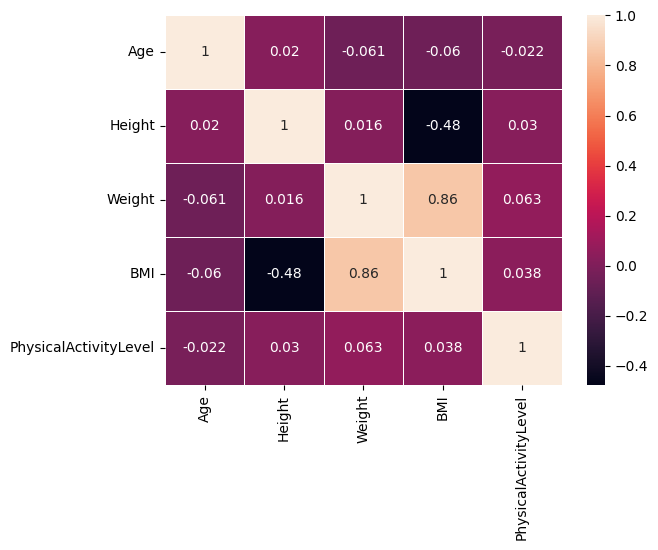

In [31]:
sns.heatmap(noGenObese, annot=True, lw=0.4, cmap="rocket")
plt.show()

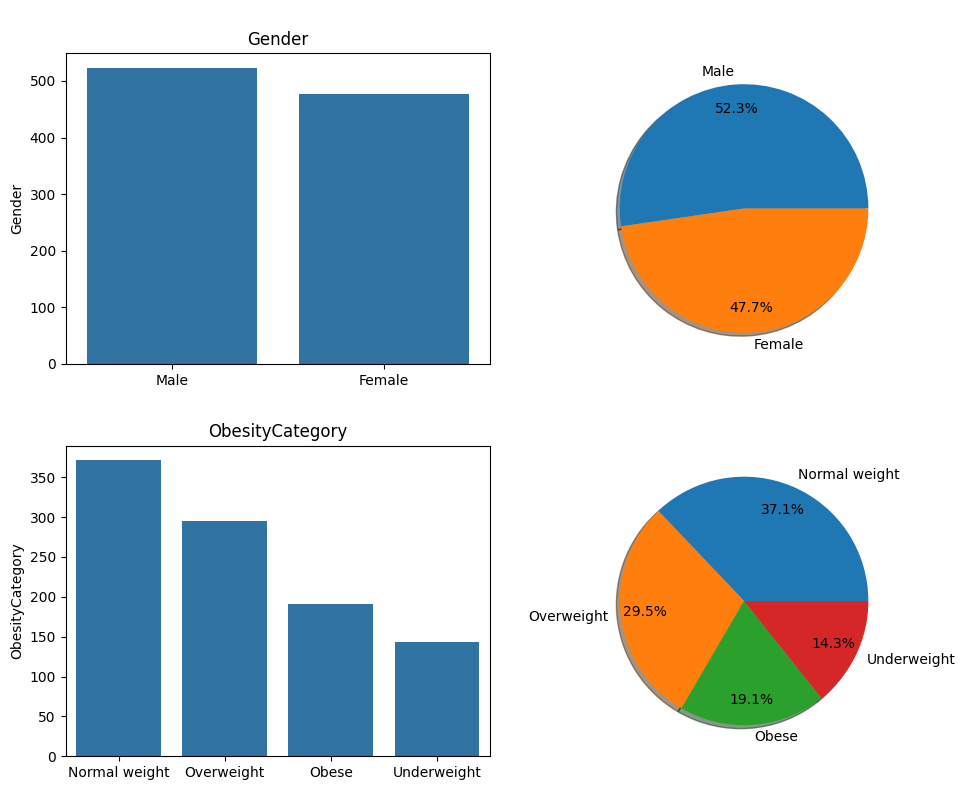

In [32]:
setDatos["Gender"].value_counts().index

plt.figure(figsize=(10,8))
j = 1
for i in ["Gender", "ObesityCategory"]:
    plt.subplot(2,2, j)
    sns.barplot(x=setDatos[i].value_counts().index, y=setDatos[i].value_counts())
    plt.xlabel("")
    plt.title(f"\n{i}")
    plt.subplot(2,2, j+1)
    plt.pie(x=setDatos[i].value_counts(), labels=setDatos[i].value_counts().index, autopct='%.1f%%',
            pctdistance=0.8, shadow=True)
    j += 2
plt.tight_layout()
plt.show()

Defining X and y

In [33]:
le = LabelEncoder()
setDatos["Gender"] = setDatos[["Gender"]].apply(le.fit_transform)

In [34]:
setDatos.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,1,173.575262,71.982051,23.891783,4,Normal weight
1,69,1,164.127306,89.959256,33.395209,2,Obese
2,46,0,168.072202,72.930629,25.817737,4,Overweight
3,32,1,168.459633,84.886912,29.912247,3,Overweight
4,60,1,183.568568,69.038945,20.487903,3,Normal weight


In [35]:
y = setDatos["ObesityCategory"]
X = setDatos.drop("ObesityCategory", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model and prediction

In [37]:
import warnings
warnings.filterwarnings("ignore")

model_list = [RandomForestClassifier(), LogisticRegression()]

model_name_list = []
model_accuracies = []

for i in model_list:
    model = i.fit(X_train_scaled, y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    model_name_list.append(model_name)
    model_accuracies.append(accuracy)

    print(f"{model_name} accuracy: {accuracy:.3f}\n")

RandomForestClassifier accuracy: 1.000

LogisticRegression accuracy: 0.956



In [38]:
print(X)

     Age  Gender      Height     Weight        BMI  PhysicalActivityLevel
0     56       1  173.575262  71.982051  23.891783                      4
1     69       1  164.127306  89.959256  33.395209                      2
2     46       0  168.072202  72.930629  25.817737                      4
3     32       1  168.459633  84.886912  29.912247                      3
4     60       1  183.568568  69.038945  20.487903                      3
..   ...     ...         ...        ...        ...                    ...
995   18       1  155.588674  64.103182  26.480345                      4
996   35       0  165.076490  97.639771  35.830783                      1
997   49       0  156.570956  78.804284  32.146036                      1
998   64       1  164.192222  57.978115  21.505965                      4
999   66       0  178.537130  74.962164  23.517168                      1

[1000 rows x 6 columns]


In [39]:
# Making a new prediction after model was trained
X = np.array([[22,1,180.22,70.33,22.22,4]])
X_new_scaled = scaler.transform(X)

In [40]:
# Printing the prediction output
y_pred = model.predict(X_new_scaled)
y_pred

array(['Normal weight'], dtype=object)

In [41]:
import pickle
# Save trained models with pickle
for model, model_name in zip(model_list, model_name_list):
    with open(f"{model_name}.pkl", "wb") as f:
        pickle.dump(model, f)

Accuracy of model


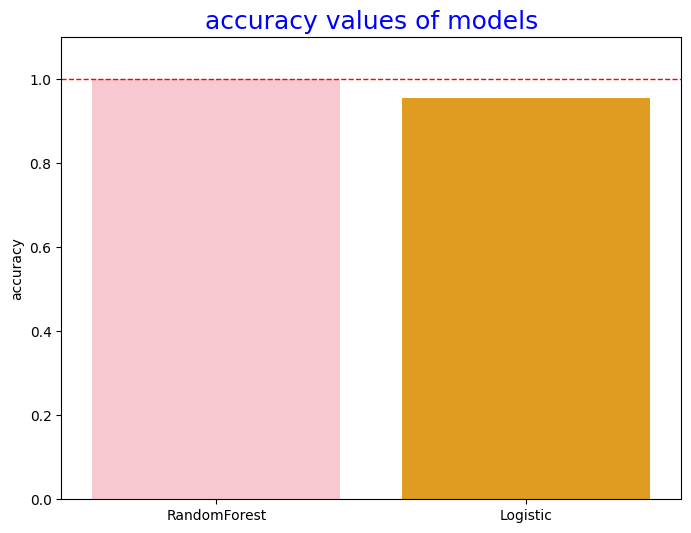

In [42]:
fig, ax=plt.subplots(figsize=(8,6))
cols = ["orange" if i < (max(model_accuracies)) else "pink" for i in model_accuracies]
sns.barplot(x=model_name_list, y=model_accuracies, ax=ax, palette=cols)
plt.ylim(0, 1.1)
plt.ylabel("accuracy")
plt.axhline(1, lw=1, ls="--", color="red")
ax.set_xticklabels(["RandomForest", "Logistic"])
plt.title("accuracy values of models", fontsize=18, color="b")
plt.show()

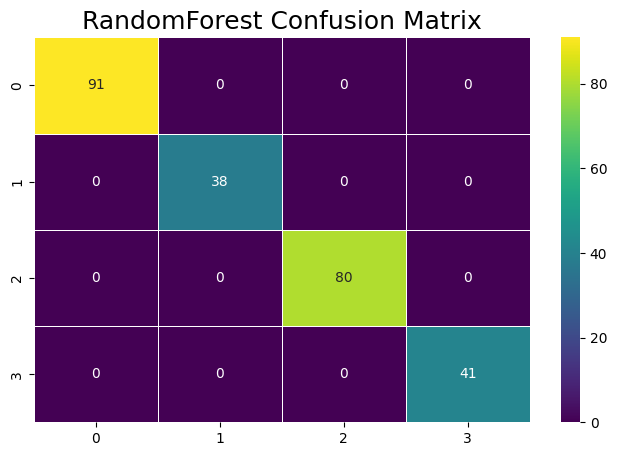

In [43]:
rf = RandomForestClassifier().fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, linewidths=0.6, cmap="viridis", fmt='.2g')
plt.title("RandomForest Confusion Matrix", fontsize=18)
plt.show()

Merging Model with Web App

In [44]:
pip install streamlit scikit-learn

In [ ]:
import streamlit as st
! wget -q -O - ipv4.icanhazip.com
! streamlit run paginaDePredict.py & npx localtunnel --port 8501

34.106.83.172
[..................] \ fetchMetadata: sill resolveWithNewModule yargs@17.1.1 ch


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.83.172:8501

npx: installed 22 in 7.302s
your url is: https://shaggy-peas-carry.loca.lt
2024-03-07 01:11:39.720 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 535, in _run_script
    exec(code, module.__dict__)
  File "/content/paginaDePredict.py", line 24, in <module>
    logistic_model = load_model("LogisticRegression.pkl")
  File "/content/paginaDePredict.py", line 20, in load_model
    model = pickle.load(f)
NameError: name 'pickle' is not defined
2024-03-07 01:12:11.635 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 535, in _run_script
    